In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the weather dataset

weather = pd.read_csv(r"weather.csv", header=0)

# Copy to back-up file

weather_bk = weather.copy()

# Display first 5 records

weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
# Display the dataset information

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
# Identify the missing data in all variables

weather.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

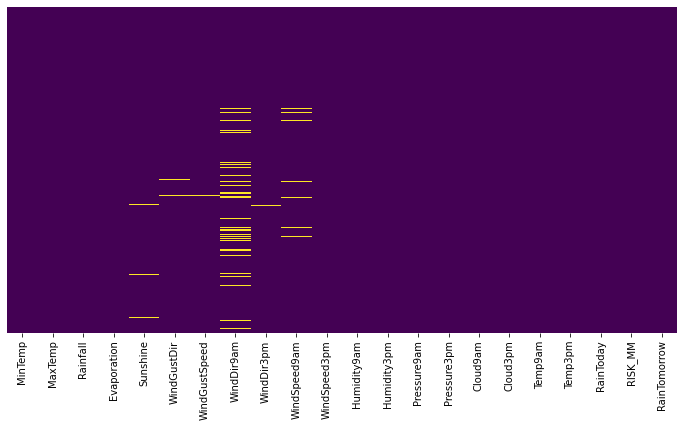

In [6]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

weather['Sunshine'] = imputer_int.fit_transform(weather[['Sunshine']])

In [8]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

weather['WindGustDir'] = imputer_str.fit_transform(weather[['WindGustDir']])
weather['WindGustSpeed'] = imputer_int.fit_transform(weather[['WindGustSpeed']])
weather['WindDir9am'] = imputer_str.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = imputer_str.fit_transform(weather[['WindDir3pm']])
weather['WindSpeed9am'] = imputer_int.fit_transform(weather[['WindSpeed9am']])

<AxesSubplot:>

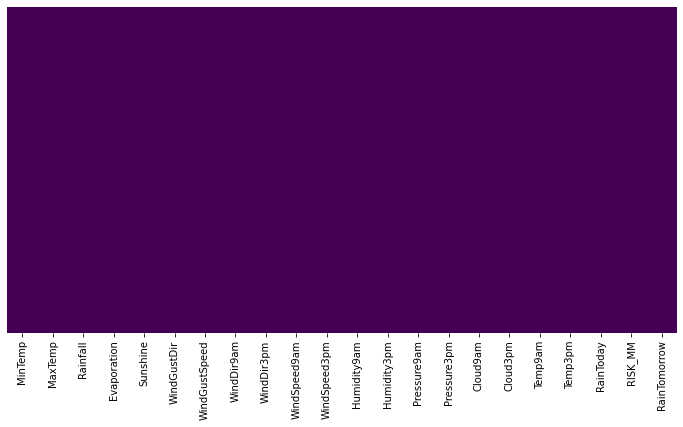

In [9]:
# Check the Visualize of missing data in graph after impute technique

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Drop the RISK_MM variable

weather.drop('RISK_MM', inplace=True,axis=1)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [11]:
# "groupby" we have important information about the possible conditions that may or may not cause rain condition

weather[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
         'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
         'Temp3pm']].groupby(weather['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [12]:
weather['WindGustDir'].value_counts()

NW     76
NNW    44
E      37
WNW    35
ENE    30
ESE    23
S      22
N      21
W      20
NE     16
SSE    12
SE     12
NNE     8
SSW     5
SW      3
WSW     2
Name: WindGustDir, dtype: int64

In [13]:
weather.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
# weather['WindGustDir'].value_counts()
for i in weather.columns:
    print(weather[i].value_counts())

0.5     6
4.4     6
15.1    5
3.2     5
2.3     5
       ..
13.9    1
9.5     1
7.7     1
11.4    1
3.3     1
Name: MinTemp, Length: 180, dtype: int64
14.8    5
20.9    5
12.2    5
15.5    5
11.6    5
       ..
17.1    1
30.3    1
35.8    1
21.2    1
30.7    1
Name: MaxTemp, Length: 187, dtype: int64
0.0     263
0.2      17
0.6       6
0.8       5
0.4       5
1.0       4
6.6       3
1.8       3
5.2       3
4.8       3
2.0       3
4.0       3
3.4       3
1.2       3
3.6       2
3.8       2
1.4       2
3.0       2
6.4       2
11.0      2
17.4      2
1.6       2
16.2      2
2.6       1
8.2       1
7.2       1
7.6       1
19.2      1
6.2       1
9.8       1
7.4       1
16.8      1
19.8      1
18.8      1
10.4      1
4.4       1
9.0       1
2.2       1
12.2      1
14.4      1
5.4       1
4.2       1
22.6      1
25.8      1
2.8       1
39.8      1
13.2      1
Name: Rainfall, dtype: int64
2.2     21
2.8     19
1.4     15
1.8     14
2.6     14
1.6     13
6.6     13
3.4     12
4.4     11
2.4   

In [15]:
# Identify the numerical and categorical variables

num_vars = weather.columns[weather.dtypes != 'object']
cat_vars = weather.columns[weather.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


In [16]:
weather['WindGustDir'].value_counts()

NW     76
NNW    44
E      37
WNW    35
ENE    30
ESE    23
S      22
N      21
W      20
NE     16
SSE    12
SE     12
NNE     8
SSW     5
SW      3
WSW     2
Name: WindGustDir, dtype: int64

In [17]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

weather['WindGustDir'] = LE.fit_transform(weather[['WindGustDir']])
weather['WindDir9am'] = LE.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = LE.fit_transform(weather[['WindDir3pm']])

In [18]:
weather['WindGustDir'].value_counts()

7     76
6     44
0     37
14    35
1     30
2     23
8     22
3     21
13    20
4     16
10    12
9     12
5      8
11     5
12     3
15     2
Name: WindGustDir, dtype: int64

In [19]:
weather['RainToday'].value_counts()

No     300
Yes     66
Name: RainToday, dtype: int64

In [20]:
# Use LabelBinarizer for target variables

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

weather['RainToday'] = LB.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = LB.fit_transform(weather['RainTomorrow'])

In [21]:
weather['RainToday'].value_counts()

0    300
1     66
Name: RainToday, dtype: int64

In [22]:
# Identify the numerical and categorical variables

num_vars = weather.columns[weather.dtypes != 'object']
cat_vars = weather.columns[weather.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
Index([], dtype='object')


In [23]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [24]:
# Identify the independent and Target variables

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)

TargetVar = 'RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

In [25]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Copy the test data to backup file

x_test_BK = x_test.copy()

In [26]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Classification models and compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[11  7]
 [ 6 86]]
Outcome values : 
 11 7 6 86
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.61      0.63        18
           0       0.92      0.93      0.93        92

    accuracy                           0.88       110
   macro avg       0.79      0.77      0.78       110
weighted avg       0.88      0.88      0.88       110

Accuracy : 88.2 %
Precision : 64.7 %
Recall : 61.1 %
F1 Score : 0.629
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 77.3 %
MCC : 0.559
roc_auc_score: 0.773


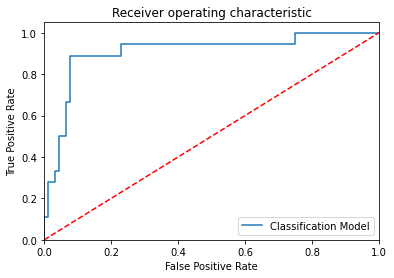

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[11  7]
 [15 77]]
Outcome values : 
 11 7 15 77
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.61      0.50        18
           0       0.92      0.84      0.88        92

    accuracy                           0.80       110
   macro avg       0.67      0.72      0.69       110
weighted avg       0.84      0.80      0.81       110

Accuracy : 80.0 %
Precision : 42.3 %
Recall : 61.1 %
F1 Score : 0.5
Specificity or True Negative Rate : 83.7 %
Balanced Accuracy : 72.4 %
MCC : 0.39
roc_auc_score: 0.724


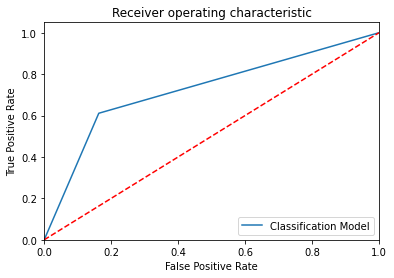

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 9  9]
 [ 5 87]]
Outcome values : 
 9 9 5 87
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.50      0.56        18
           0       0.91      0.95      0.93        92

    accuracy                           0.87       110
   macro avg       0.77      0.72      0.74       110
weighted avg       0.86      0.87      0.87       110

Accuracy : 87.3 %
Precision : 64.3 %
Recall : 50.0 %
F1 Score : 0.562
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 72.3 %
MCC : 0.495
roc_auc_score: 0.723


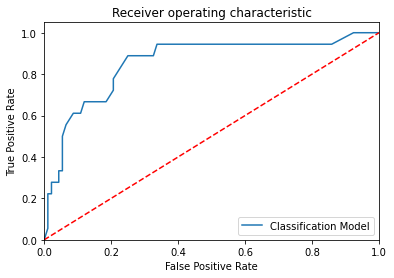

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10  8]
 [ 4 88]]
Outcome values : 
 10 8 4 88
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.56      0.63        18
           0       0.92      0.96      0.94        92

    accuracy                           0.89       110
   macro avg       0.82      0.76      0.78       110
weighted avg       0.88      0.89      0.89       110

Accuracy : 89.1 %
Precision : 71.4 %
Recall : 55.6 %
F1 Score : 0.625
Specificity or True Negative Rate : 95.7 %
Balanced Accuracy : 75.6 %
MCC : 0.568
roc_auc_score: 0.756


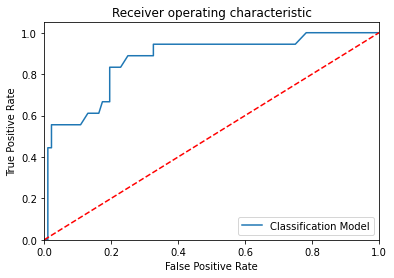

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 7 11]
 [ 6 86]]
Outcome values : 
 7 11 6 86
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.39      0.45        18
           0       0.89      0.93      0.91        92

    accuracy                           0.85       110
   macro avg       0.71      0.66      0.68       110
weighted avg       0.83      0.85      0.84       110

Accuracy : 84.5 %
Precision : 53.8 %
Recall : 38.9 %
F1 Score : 0.452
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 66.2 %
MCC : 0.371
roc_auc_score: 0.662


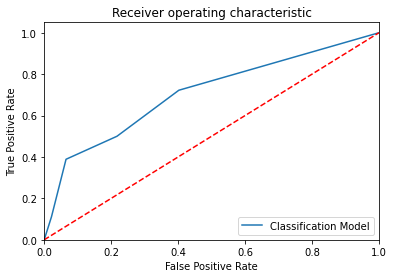

-----------------------------------------------------------------------------------------------------
Model Name:  MLPClassifier()
Confusion matrix : 
 [[13  5]
 [ 9 83]]
Outcome values : 
 13 5 9 83
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.72      0.65        18
           0       0.94      0.90      0.92        92

    accuracy                           0.87       110
   macro avg       0.77      0.81      0.79       110
weighted avg       0.89      0.87      0.88       110

Accuracy : 87.3 %
Precision : 59.1 %
Recall : 72.2 %
F1 Score : 0.65
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 81.2 %
MCC : 0.577
roc_auc_score: 0.812


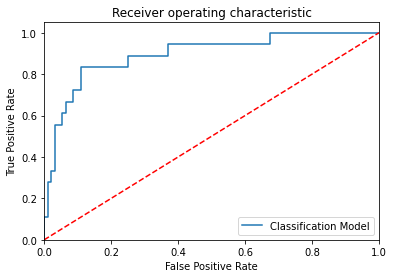

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[10  8]
 [ 6 86]]
Outcome values : 
 10 8 6 86
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.56      0.59        18
           0       0.91      0.93      0.92        92

    accuracy                           0.87       110
   macro avg       0.77      0.75      0.76       110
weighted avg       0.87      0.87      0.87       110

Accuracy : 87.3 %
Precision : 62.5 %
Recall : 55.6 %
F1 Score : 0.588
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 74.6 %
MCC : 0.515
roc_auc_score: 0.745


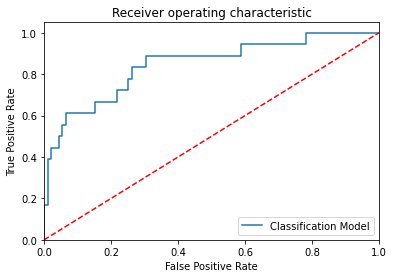

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[14  4]
 [17 75]]
Outcome values : 
 14 4 17 75
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.78      0.57        18
           0       0.95      0.82      0.88        92

    accuracy                           0.81       110
   macro avg       0.70      0.80      0.72       110
weighted avg       0.87      0.81      0.83       110

Accuracy : 80.9 %
Precision : 45.2 %
Recall : 77.8 %
F1 Score : 0.571
Specificity or True Negative Rate : 81.5 %
Balanced Accuracy : 79.6 %
MCC : 0.488
roc_auc_score: 0.796


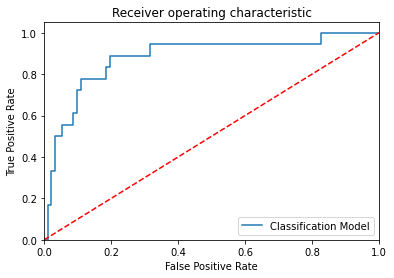

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 9  9]
 [ 3 89]]
Outcome values : 
 9 9 3 89
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.50      0.60        18
           0       0.91      0.97      0.94        92

    accuracy                           0.89       110
   macro avg       0.83      0.73      0.77       110
weighted avg       0.88      0.89      0.88       110

Accuracy : 89.1 %
Precision : 75.0 %
Recall : 50.0 %
F1 Score : 0.6
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 73.4 %
MCC : 0.555
roc_auc_score: 0.734


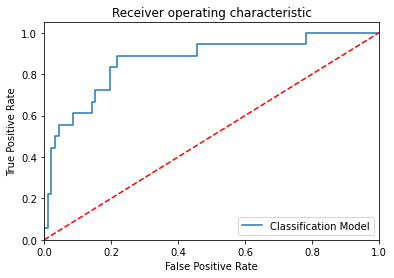

-----------------------------------------------------------------------------------------------------


In [27]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelMLP = MLPClassifier()
ModelGB = GradientBoostingClassifier()
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelMLP, ModelGB, ModelGNB, ModelSVM]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    
    
    
    
    
    
    print('-----------------------------------------------------------------------------------------------------')

In [29]:
# Load the Result dataset

Results1 = pd.read_csv(r"E:\SDP-2\S10-Missing Values\EMResults.csv", header=0)
Results1.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [30]:
aaa_row = {'Model Name' : models,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'roc_auc_score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
Results1 = Results1.append(aaa_row, ignore_index=True)

In [31]:
#Results = Results.append(new_row, ignore_index=True)
Results1.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,roc_auc_score
0,SVC(probability=True),0.891,0.75,0.5,0.6,0.967,0.555,NaN,0.734,0.733696


In [ ]:
Results1.to_csv("D://000 DataScience//01-Internship//Result_OutFile-05.csv")